# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | la sarre
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | metkovic
Processing Record 8 of Set 1 | nyurba
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | wamba
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | kirakira
Processing Record 15 of Set 1 | yemva
Processing Record 16 of Set 1 | kyakhta
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | hoopstad
Processing Record 20 of Set 1 | buta
Processing Record 21 of Set 1 | barvinkove
Processing Record 22 of Set 1 | atar
Processing Record 23 of

City not found. Skipping...
Processing Record 43 of Set 4 | angaur state
Processing Record 44 of Set 4 | fannuj
City not found. Skipping...
Processing Record 45 of Set 4 | turochak
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | angarsk
Processing Record 48 of Set 4 | malvan
Processing Record 49 of Set 4 | isafjordur
Processing Record 0 of Set 5 | prince george
Processing Record 1 of Set 5 | uturoa
Processing Record 2 of Set 5 | zapolyarnyy
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | anshun
Processing Record 5 of Set 5 | kismayo
Processing Record 6 of Set 5 | alice springs
Processing Record 7 of Set 5 | kapuskasing
Processing Record 8 of Set 5 | darwin
Processing Record 9 of Set 5 | ust-nera
Processing Record 10 of Set 5 | peno
Processing Record 11 of Set 5 | tromso
Processing Record 12 of Set 5 | mahanoro
Processing Record 13 of Set 5 | nantucket
Processing Record 14 of Set 5 | eforie sud
Processing Record 15 o

Processing Record 38 of Set 8 | laojunmiao
Processing Record 39 of Set 8 | imbituba
Processing Record 40 of Set 8 | vallenar
Processing Record 41 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 42 of Set 8 | nadi
Processing Record 43 of Set 8 | san antonio de pale
Processing Record 44 of Set 8 | gordonvale
Processing Record 45 of Set 8 | puerto aysen
Processing Record 46 of Set 8 | guixi
Processing Record 47 of Set 8 | vallegrande
Processing Record 48 of Set 8 | akureyri
Processing Record 49 of Set 8 | kruisfontein
Processing Record 0 of Set 9 | qal'at bishah
City not found. Skipping...
Processing Record 1 of Set 9 | akcakoca
Processing Record 2 of Set 9 | karakulino
Processing Record 3 of Set 9 | tsiolkovskiy
City not found. Skipping...
Processing Record 4 of Set 9 | alta
Processing Record 5 of Set 9 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 6 of Set 9 | bamboo flat
Processing Record 7 of Set 9 | ouellah
City not found. Skipping...
Proce

Processing Record 23 of Set 12 | mahibadhoo
Processing Record 24 of Set 12 | chiapa de corzo
Processing Record 25 of Set 12 | dhuusamarreeb
Processing Record 26 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 27 of Set 12 | laguna
Processing Record 28 of Set 12 | pangai
Processing Record 29 of Set 12 | sirte
Processing Record 30 of Set 12 | altamira
Processing Record 31 of Set 12 | moroni
Processing Record 32 of Set 12 | mar del plata
Processing Record 33 of Set 12 | montecanal
Processing Record 34 of Set 12 | dunedin
Processing Record 35 of Set 12 | el trebol
Processing Record 36 of Set 12 | floro
Processing Record 37 of Set 12 | magnitka
Processing Record 38 of Set 12 | prince rupert
Processing Record 39 of Set 12 | zhangye
Processing Record 40 of Set 12 | bereznik
Processing Record 41 of Set 12 | tionk essil
Processing Record 42 of Set 12 | kotido
Processing Record 43 of Set 12 | trevelin
Processing Record 44 of Set 12 | termas de rio hondo
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,36.68,88,2,11.88,GS,1696209778
1,bilibino,68.0546,166.4372,29.95,79,100,4.47,RU,1696209778
2,wailua homesteads,22.0669,-159.3780,86.43,83,40,11.50,US,1696209682
3,la sarre,48.8002,-79.1996,57.20,69,90,3.65,CA,1696209778
4,st. john's,47.5649,-52.7093,55.98,87,40,23.02,CA,1696209725


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,36.68,88,2,11.88,GS,1696209778
1,bilibino,68.0546,166.4372,29.95,79,100,4.47,RU,1696209778
2,wailua homesteads,22.0669,-159.3780,86.43,83,40,11.50,US,1696209682
3,la sarre,48.8002,-79.1996,57.20,69,90,3.65,CA,1696209778
4,st. john's,47.5649,-52.7093,55.98,87,40,23.02,CA,1696209725


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

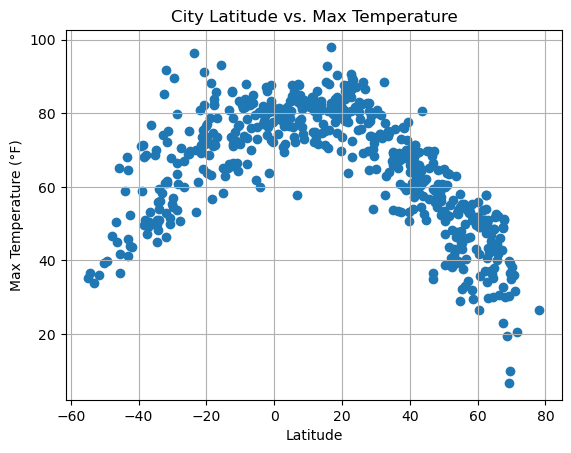

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

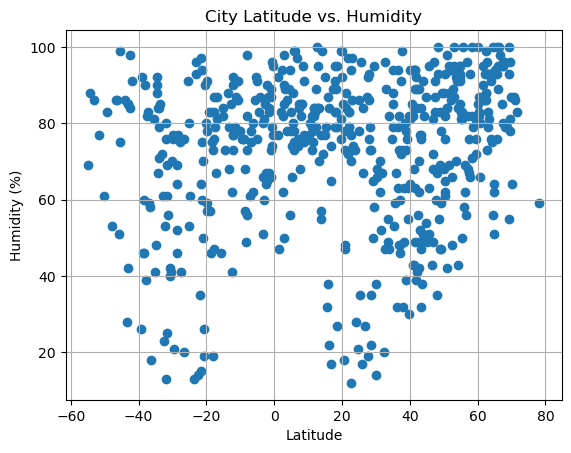

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

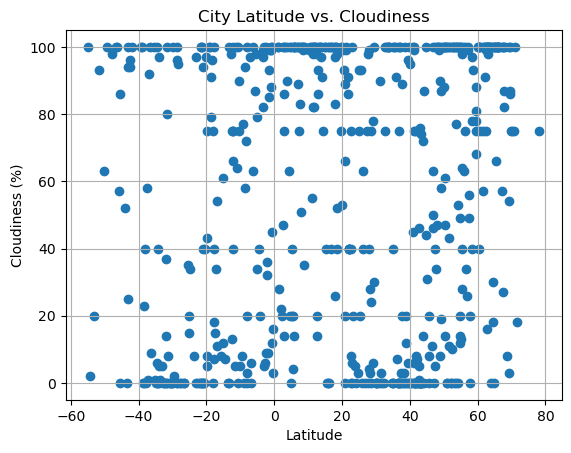

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

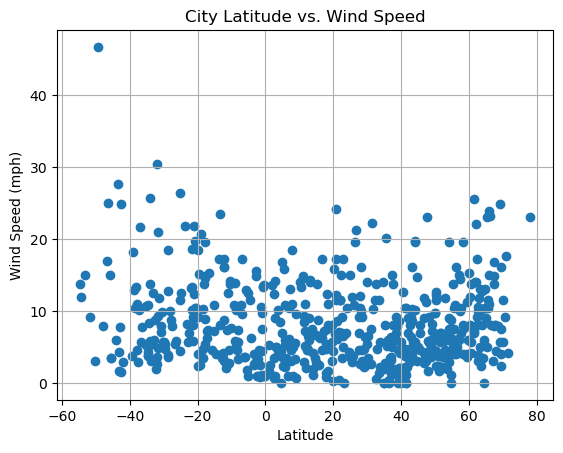

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regression_values = x_values * slope + intercept

    # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o", alpha=0.5, label="Data")

    # Plot the regression line
    plt.plot(x_values, regression_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")

    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the linear regression formula on the graph
    formula_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(formula_text, (x_values.max(), y_values.max()), color="red")

    # Show plot
    print(f"The r-value is: {round(r_value, 2)}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,29.95,79,100,4.47,RU,1696209778
2,wailua homesteads,22.0669,-159.3780,86.43,83,40,11.50,US,1696209682
3,la sarre,48.8002,-79.1996,57.20,69,90,3.65,CA,1696209778
4,st. john's,47.5649,-52.7093,55.98,87,40,23.02,CA,1696209725
6,metkovic,43.0542,17.6483,61.27,52,0,6.38,HR,1696209779


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,36.68,88,2,11.88,GS,1696209778
5,vila velha,-20.3297,-40.2925,71.55,90,40,10.36,BR,1696209779
9,port-aux-francais,-49.3500,70.2167,39.78,83,100,46.68,TF,1696209779
12,hithadhoo,-0.6000,73.0833,81.70,74,12,13.31,MV,1696209779
13,kirakira,-10.4544,161.9205,83.41,78,90,14.20,SB,1696209779


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.86


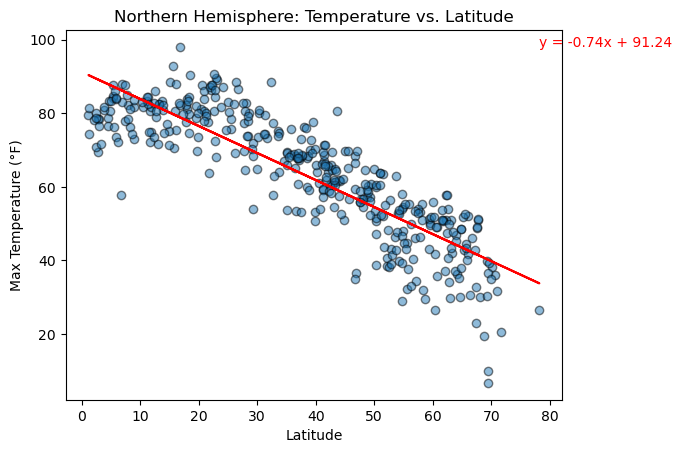

In [16]:
# Linear regression on Northern Hemisphere
# Select data for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Call the plot_linear_regression function for temperature vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Northern Hemisphere: Temperature vs. Latitude"
x_label = "Latitude"
y_label = "Max Temperature (°F)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

The r-value is: 0.72


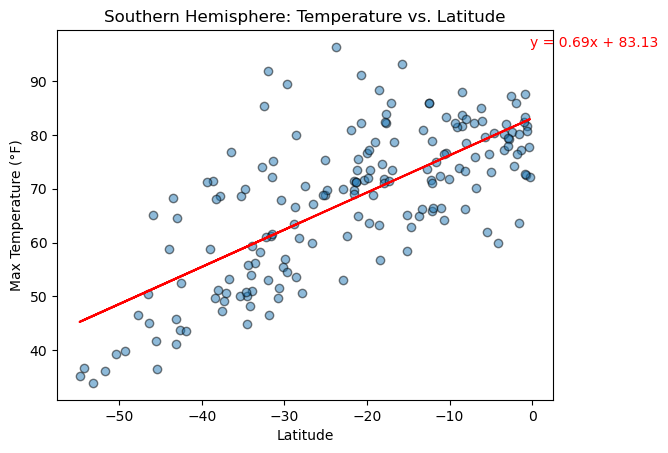

In [17]:
# Linear regression on Southern Hemisphere
# Select data for Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Call the plot_linear_regression function for temperature vs. latitude in the Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
title_southern = "Southern Hemisphere: Temperature vs. Latitude"
x_label_southern = "Latitude"
y_label_southern = "Max Temperature (°F)"

plot_linear_regression(x_values_southern, y_values_southern, title_southern, x_label_southern, y_label_southern)

**Discussion about the linear relationship:** The temperature tends to decreases further from the equator (either towards the North Pole in the Northern Hemisphere or towards the South Pole in the Southern Hemisphere). This suggests that latitude or distance away from equator may be a primary driver of temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11


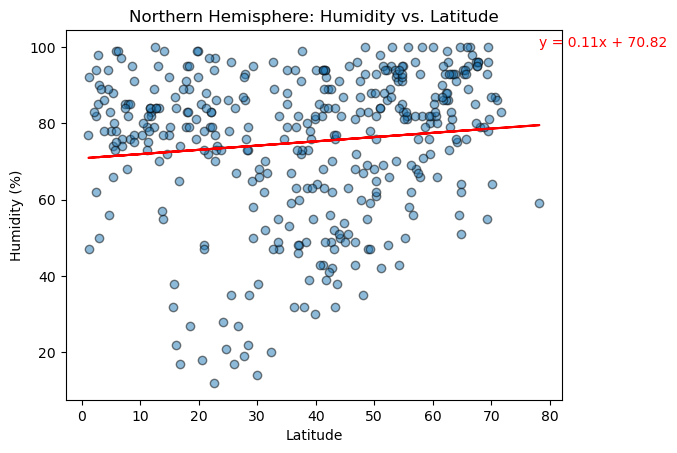

In [18]:
# Northern Hemisphere: Humidity vs. Latitude
x_values_humidity = northern_hemi_df["Lat"]
y_values_humidity = northern_hemi_df["Humidity"]
title_humidity = "Northern Hemisphere: Humidity vs. Latitude"
x_label_humidity = "Latitude"
y_label_humidity = "Humidity (%)"

plot_linear_regression(x_values_humidity, y_values_humidity, title_humidity, x_label_humidity, y_label_humidity)

The r-value is: 0.17


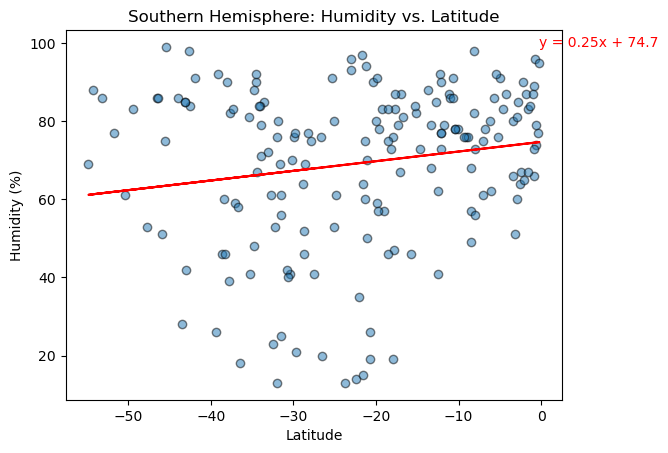

In [19]:
# Southern Hemisphere: Humidity vs. Latitude
x_values_humidity_southern = southern_hemi_df["Lat"]
y_values_humidity_southern = southern_hemi_df["Humidity"]
title_humidity_southern = "Southern Hemisphere: Humidity vs. Latitude"
x_label_humidity_southern = "Latitude"
y_label_humidity_southern = "Humidity (%)"

plot_linear_regression(x_values_humidity_southern, y_values_humidity_southern, title_humidity_southern, x_label_humidity_southern, y_label_humidity_southern)

**Discussion about the linear relationship:** There is a slight difference in humidity levels between the Northern and Southern Hemispheres, but not significant enough to be noted. This suggests that latitude may not be a primary driver of humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01


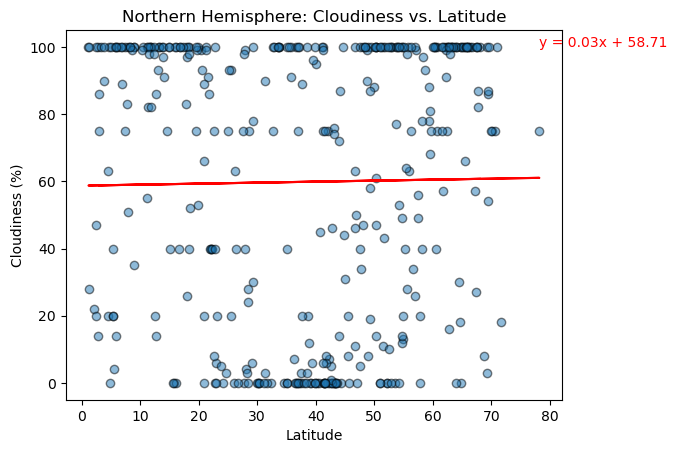

In [20]:
# Northern Hemisphere: Cloudiness vs. Latitude
x_values_cloudiness_northern = northern_hemi_df["Lat"]
y_values_cloudiness_northern = northern_hemi_df["Cloudiness"]
title_cloudiness_northern = "Northern Hemisphere: Cloudiness vs. Latitude"
x_label_cloudiness_northern = "Latitude"
y_label_cloudiness_northern = "Cloudiness (%)"

plot_linear_regression(x_values_cloudiness_northern, y_values_cloudiness_northern, title_cloudiness_northern, x_label_cloudiness_northern, y_label_cloudiness_northern)

The r-value is: 0.07


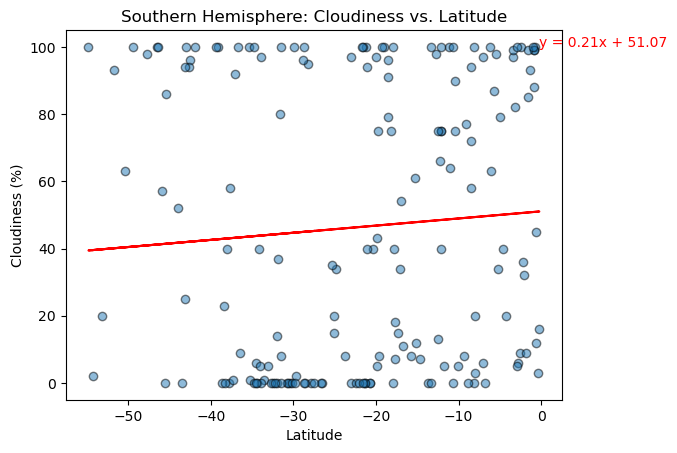

In [21]:
# Southern Hemisphere: Cloudiness vs. Latitude
x_values_cloudiness_southern = southern_hemi_df["Lat"]
y_values_cloudiness_southern = southern_hemi_df["Cloudiness"]
title_cloudiness_southern = "Southern Hemisphere: Cloudiness vs. Latitude"
x_label_cloudiness_southern = "Latitude"
y_label_cloudiness_southern = "Cloudiness (%)"

plot_linear_regression(x_values_cloudiness_southern, y_values_cloudiness_southern, title_cloudiness_southern, x_label_cloudiness_southern, y_label_cloudiness_southern)

**Discussion about the linear relationship:** Cloudiness does not necessarily increase significantly with distance from the equator. However, cloudiness in the Northern Hemisphere incrases slightly with distance from the equator, while cloudiness in the Southern Hemisphere decrease with distance from the equator. This suggests that cloudiness is influenced by a combination of factors beyond just latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14


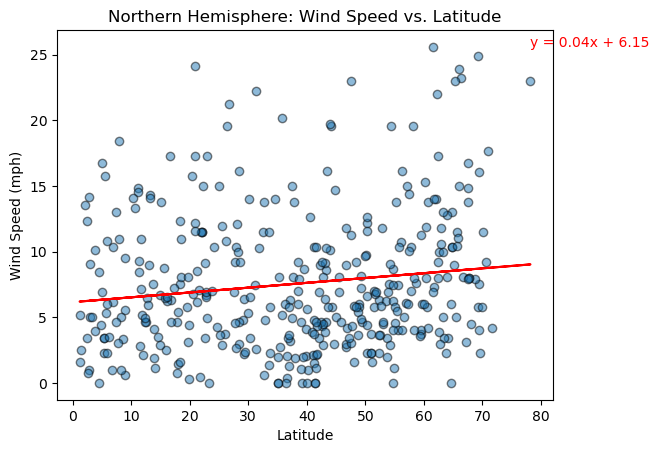

In [22]:
# Northern Hemisphere: Wind Speed vs. Latitude
x_values_wind_speed_northern = northern_hemi_df["Lat"]
y_values_wind_speed_northern = northern_hemi_df["Wind Speed"]
title_wind_speed_northern = "Northern Hemisphere: Wind Speed vs. Latitude"
x_label_wind_speed_northern = "Latitude"
y_label_wind_speed_northern = "Wind Speed (mph)"

plot_linear_regression(x_values_wind_speed_northern, y_values_wind_speed_northern, title_wind_speed_northern, x_label_wind_speed_northern, y_label_wind_speed_northern)

The r-value is: -0.21


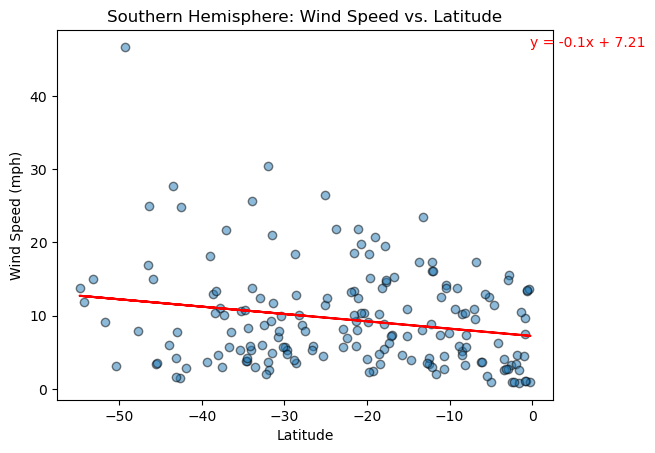

In [23]:
# Southern Hemisphere: Wind Speed vs. Latitude
x_values_wind_speed_southern = southern_hemi_df["Lat"]
y_values_wind_speed_southern = southern_hemi_df["Wind Speed"]
title_wind_speed_southern = "Southern Hemisphere: Wind Speed vs. Latitude"
x_label_wind_speed_southern = "Latitude"
y_label_wind_speed_southern = "Wind Speed (mph)"

plot_linear_regression(x_values_wind_speed_southern, y_values_wind_speed_southern, title_wind_speed_southern, x_label_wind_speed_southern, y_label_wind_speed_southern)

**Discussion about the linear relationship:** Windspeed in the Northern Hemisphere is consistentely and low, while in the Southern Hemisphere the windspeed increase with distance from the equator (closer to the South Pole). This suggests that windspeed may be influenced by a combination of latitude and pole, but further analysis is needed to determine this. 

## No. of Cities in Northern vs. Southern Hemisphere

In [24]:
# Count the number of cities in the Northern Hemisphere (Latitude >= 0)
num_cities_northern_hem = len(city_data_df[city_data_df["Lat"] >= 0])

# Count the number of cities in the Southern Hemisphere (Latitude < 0)
num_cities_southern_hem = len(city_data_df[city_data_df["Lat"] < 0])

# Print the counts
print(f"Number of cities in the Northern Hemisphere: {num_cities_northern_hem}")
print(f"Number of cities in the Southern Hemisphere: {num_cities_southern_hem}")

Number of cities in the Northern Hemisphere: 387
Number of cities in the Southern Hemisphere: 178


**Discussion:** It should be noted that the number of data points for the Northern Hemisphere is significantly higher than that of the Southern Hemisphere. Therefore, the analysis for the Northern Hem has a higher statistical accuracy compared to the analysis of the Southern Hem. In this analysis, the temperature, humidity, cloudiness, and wind speed data are based on the cities in the two hemispheres, rather than an analysis of the hemispheres themselves.